# Task6: Predicting Real Estate House Prices

## This task is provided to test your understanding of building a Linear Regression model for a provided dataset

### Dataset: Real_estate.csv

### Import the necessary libraries
#### Hint: Also import seaborn

In [ ]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np

### Read the csv data into a pandas dataframe and display the first 5 samples

In [ ]:
df = pd.read_csv('/content/Real estate.csv')
print(df.head())

   No  X1 transaction date  X2 house age  \
0   1             2012.917          32.0   
1   2             2012.917          19.5   
2   3             2013.583          13.3   
3   4             2013.500          13.3   
4   5             2012.833           5.0   

   X3 distance to the nearest MRT station  X4 number of convenience stores  \
0                                84.87882                               10   
1                               306.59470                                9   
2                               561.98450                                5   
3                               561.98450                                5   
4                               390.56840                                5   

   X5 latitude  X6 longitude  Y house price of unit area  
0     24.98298     121.54024                        37.9  
1     24.98034     121.53951                        42.2  
2     24.98746     121.54391                        47.3  
3     24.98746     121.54391  

### Show more information about the dataset

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


### Find how many samples are there and how many columns are there in the dataset

In [ ]:
print(df.shape)

(414, 8)


### What are the features available in the dataset?

In [ ]:
print(df.columns)

Index(['No', 'X1 transaction date', 'X2 house age',
       'X3 distance to the nearest MRT station',
       'X4 number of convenience stores', 'X5 latitude', 'X6 longitude',
       'Y house price of unit area'],
      dtype='object')


### Check if any features have missing data

In [ ]:
print(df.isnull().sum())

No                                        0
X1 transaction date                       0
X2 house age                              0
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
X5 latitude                               0
X6 longitude                              0
Y house price of unit area                0
dtype: int64


### Group all the features as dependent features in X

In [ ]:
X = df.drop(columns=['Y house price of unit area'])
print("Independent features (X):")
print(X)

Independent features (X):
      No  X1 transaction date  X2 house age  \
0      1             2012.917          32.0   
1      2             2012.917          19.5   
2      3             2013.583          13.3   
3      4             2013.500          13.3   
4      5             2012.833           5.0   
..   ...                  ...           ...   
409  410             2013.000          13.7   
410  411             2012.667           5.6   
411  412             2013.250          18.8   
412  413             2013.000           8.1   
413  414             2013.500           6.5   

     X3 distance to the nearest MRT station  X4 number of convenience stores  \
0                                  84.87882                               10   
1                                 306.59470                                9   
2                                 561.98450                                5   
3                                 561.98450                                5   
4        

### Group feature(s) as independent features in y

In [ ]:
y = df['Y house price of unit area']
print("Dependent feature (y):")
print(y)

Dependent feature (y):
0      37.9
1      42.2
2      47.3
3      54.8
4      43.1
       ... 
409    15.4
410    50.0
411    40.6
412    52.5
413    63.9
Name: Y house price of unit area, Length: 414, dtype: float64


### Split the dataset into train and test data

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=42)
print("Shapes of the splits:")
print(f"X_train: {X_train.shape}, X_test: {X_test.shape}")
print(f"y_train: {y_train.shape}, y_test: {y_test.shape}")

Shapes of the splits:
X_train: (393, 7), X_test: (21, 7)
y_train: (393,), y_test: (21,)


### Choose the model (Linear Regression)

In [ ]:
from sklearn.linear_model import LinearRegression

### Create an Estimator object

In [ ]:
estimator = LinearRegression()

### Train the model

In [ ]:
estimator.fit(X_train, y_train)
print("Model trained successfully.")

Model trained successfully.


### Apply the model

In [ ]:
y_pred = estimator.predict(X_test)

# Convert predictions to a NumPy array and display
print(np.array(y_pred))

[47.37324517 40.67490479 43.38252    39.2288875  26.80886894 45.52710831
 44.23554581 46.4223488  24.3551168  54.81551634 34.26610156 36.72006427
 36.600396   24.15337694 35.39022958 33.58654479 43.92244407 45.30005946
 29.40294769 44.6910531   1.18828452]


### Display the coefficients

In [ ]:
print(estimator.coef_)

[-3.92174168e-03  5.37381113e+00 -2.70428680e-01 -4.71459414e-03
  1.10223141e+00  2.10493682e+02 -1.93197441e+01]


### Find how well the trained model did with testing data

In [ ]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print(f"r2 Score: {r2}")

r2 Score: 0.6451949957216452


### Plot House Age Vs Price
#### Hint: Use regplot in sns

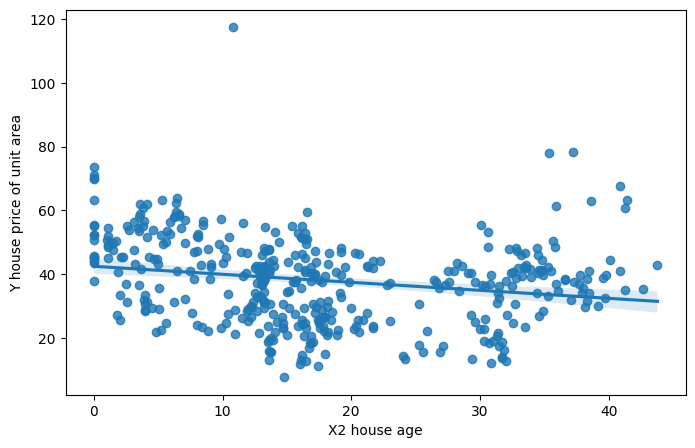

In [ ]:
plt.figure(figsize=(8, 5))
sns.regplot(x='X2 house age', y='Y house price of unit area', data=df)
plt.show()

### Plot Distance to MRT station Vs Price

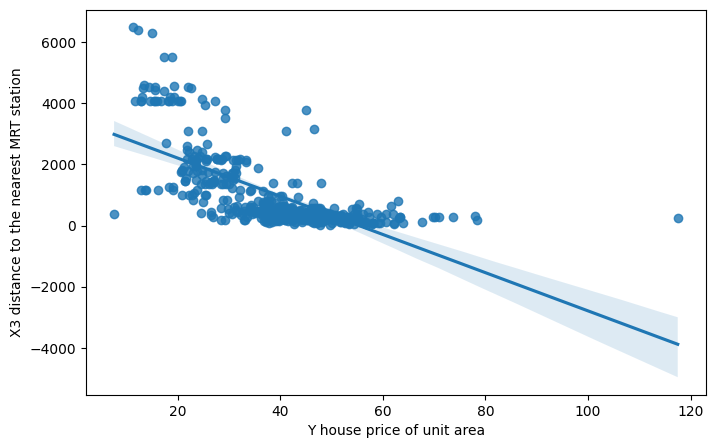

In [ ]:
plt.figure(figsize=(8, 5))
sns.regplot(x='Y house price of unit area', y='X3 distance to the nearest MRT station', data=df)
plt.show()

### Plot Number of Convienience Stores Vs Price

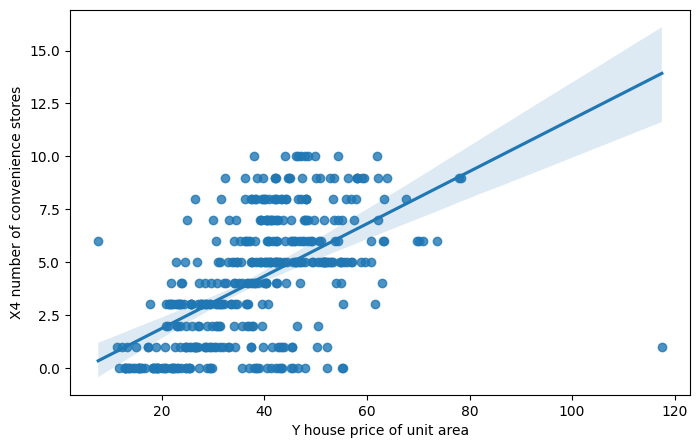

In [ ]:
plt.figure(figsize=(8, 5))
sns.regplot(x='Y house price of unit area', y='X4 number of convenience stores', data=df)
plt.show()